In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine,reflect=True)

In [13]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

('2017-08-23',)
2016-08-23


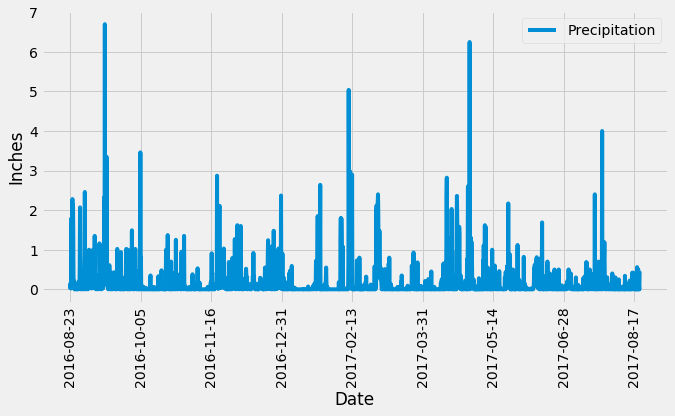

In [121]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results:
# Calculate the date 1 year ago from the last data point in the database
lastDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(lastDate)
startDate = dt.date(2017,8,23) - dt.timedelta(days=365)
print(startDate)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date,Measurement.prcp)\
.filter(Measurement.date >= startDate).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(data)
prcp_df = prcp_df.dropna()
prcp_df = prcp_df.set_index('date')
prcp_df = prcp_df.rename(columns={'prcp':'precipitation'})

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
prcp_plot = prcp_df.plot(figsize=(10,5));
plt.xticks(rotation=90);
plt.xlabel('Date');
plt.ylabel('Inches');
prcp_plot.legend(['Precipitation']);

In [94]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe(percentiles=[]).round(2)

,precipitation
count,2021.00
mean,0.18
std,0.46
min,0.00
50%,0.02
max,6.70


In [95]:
# Design a query to show how many stations are available in this dataset.
session.query(Station).count()

9

In [99]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
top_station = 'USC00519281'

In [100]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station.
session.query(Measurement.station,\
              func.min(Measurement.tobs),\
              func.max(Measurement.tobs),\
              func.avg(Measurement.tobs)).filter(Measurement.station == top_station).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

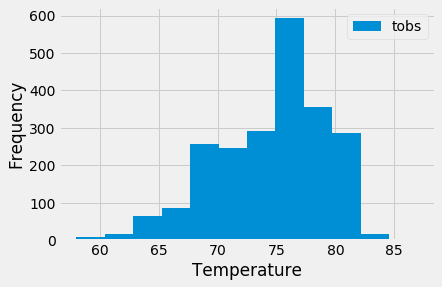

In [118]:
# Choose the station with the highest number of temperature observations.
session.query(Measurement.station, func.count(Measurement.tobs))\
.group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
top_station = 'USC00519281'

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.tobs).filter(Measurement.date >= startDate).all()
temps_df = pd.DataFrame(temps)

temps_df.plot.hist(bins=12);
plt.xlabel("Temperature");

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
